In [1]:
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

apps = apps_with_duplicates.drop_duplicates()

print('Total number of apps in the dataset = ', apps.shape[0])

#print(apps.describe())
print(apps.info())
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5866,6899,BlitzWolf Shutter - BW Shutter,PHOTOGRAPHY,2.9,333,1.8,"50,000+",Free,0,Everyone,Photography,"November 22, 2017",1.8.0,4.0 and up
1177,1454,Trulia Real Estate & Rentals,HOUSE_AND_HOME,4.5,175293,NaN,"10,000,000+",Free,0,Everyone,House & Home,"July 24, 2018",Varies with device,Varies with device
5500,6513,[BN] Blitz,SPORTS,3.2,4,5.6,100+,Free,0,Everyone,Sports,"May 17, 2018",4.6,4.3 and up
5899,6935,Hypocam,PHOTOGRAPHY,4.5,12572,8.5,"1,000,000+",Free,0,Everyone,Photography,"March 14, 2018",1.31,4.0 and up
7903,9022,DX,SHOPPING,3.1,6697,11.0,"500,000+",Free,0,Everyone,Shopping,"February 1, 2018",4.2.1,4.0 and up


In [2]:
chars_to_remove = ['$',",","+"]
# List of column names to clean
cols_to_clean = ["Installs","Price"]

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

apps.sample(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8583,9725,EP Chain Reaction,FAMILY,3.9,249,21.0,10000,Free,0.00,Everyone,Casual;Brain Games,"April 10, 2016",1.2.2,2.3 and up
7054,8120,Math Solver,FAMILY,4.3,2250,30.0,100000,Free,0.00,Everyone,Education,"November 21, 2017",1.2,4.1 and up
8877,10036,ADWLauncher 1 EX,PERSONALIZATION,4.3,28728,2.8,500000,Paid,2.49,Everyone,Personalization,"July 27, 2013",1.3.3.9,1.6 and up
5549,6564,Thai Sic Bo,GAME,4.1,14283,4.2,1000000,Free,0.00,Teen,Casino,"October 1, 2017",1.1.2,4.0 and up
1662,2125,Disney Crossy Road,FAMILY,4.5,514088,83.0,10000000,Free,0.00,Everyone,Arcade;Action & Adventure,"May 30, 2018",3.200.18289,4.4 and up


In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [4]:
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


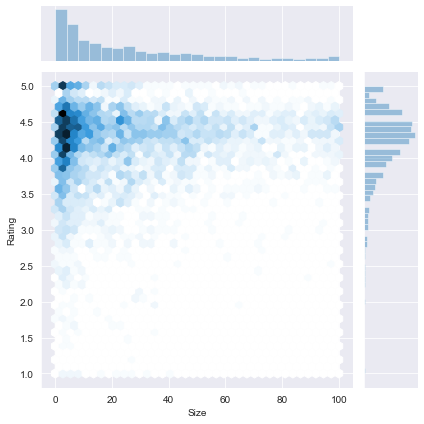

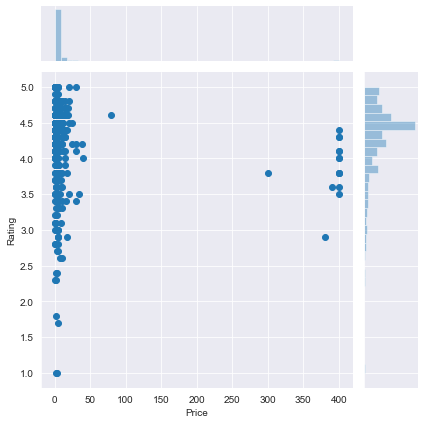

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()

plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = 'hex')

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


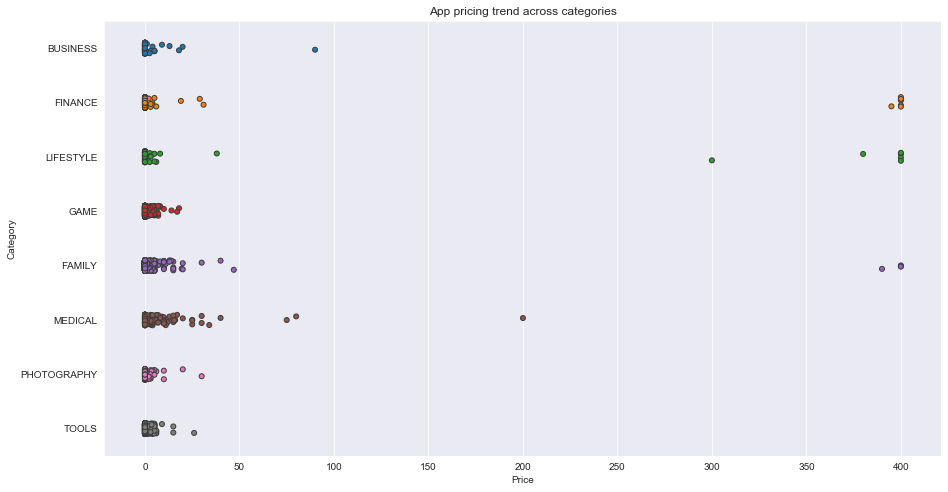

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]
apps_above_200

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

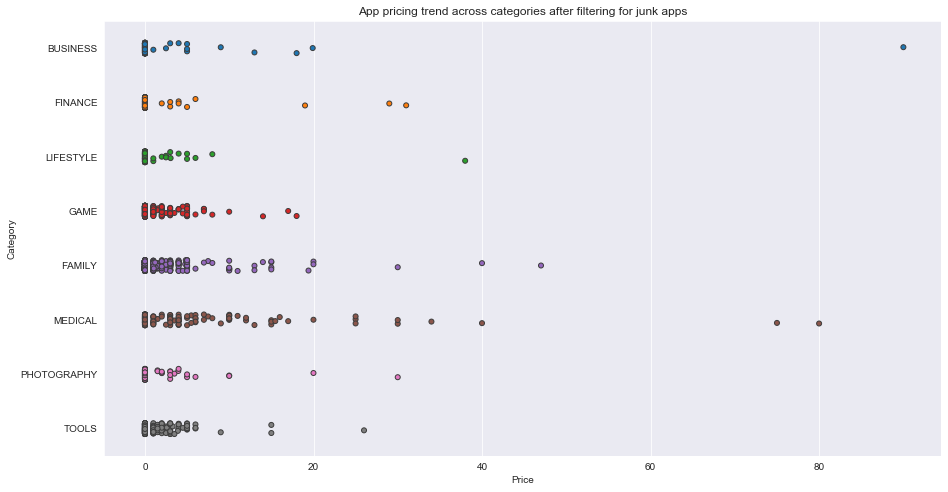

In [7]:
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x="Price", y="Category", data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [8]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

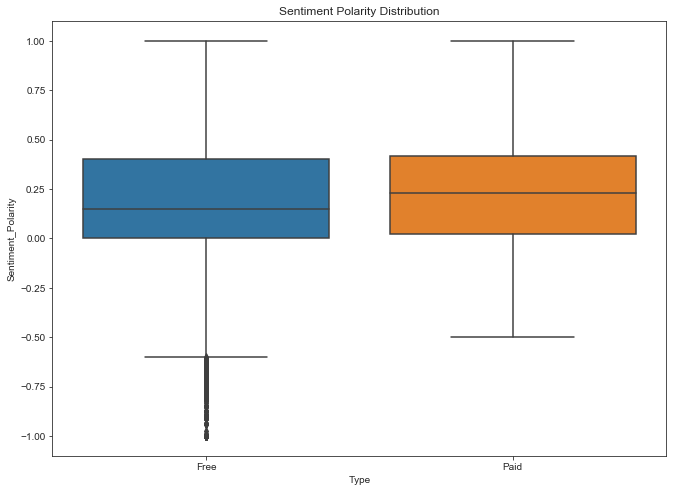

In [9]:
reviews_df = pd.read_csv("datasets/user_reviews.csv")

merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')